## Supervised Learning: KNN and SVC

Supervised learning is the machine learning task of inferring a function from labeled training data.
There are basically two types of functions in supervised learning: classifiers and regressors.

- Classification: the output is a class label(like object recognition).
- Regression: the output is a continuous value (like age or temperature).

In this example we start with classification of a collection of iris flowers.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print iris.data.shape

(150, 4)


The data we loaded contains 150 observations of irises, each described by 4 features: their sepal and petal length and width. This is a classic dataset used in machine learning for explaining problems like clustering and classification.

For a more complete description, run the next line, which has all the details about the dataset.

In [2]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

One quick way to check out the dataset is to plot each of the four features in relation to the others.

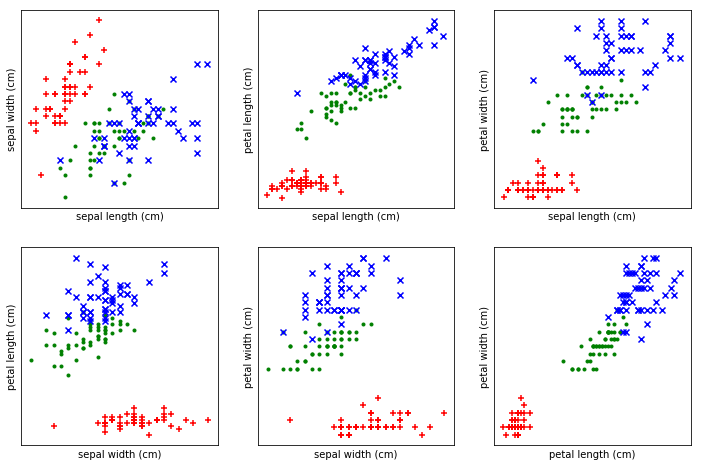

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = iris.data
y = iris.target
feature_names = iris.feature_names

pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
plt.figure(figsize=(12,8))
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(x[y == 0, p0], x[y == 0, p1], marker="+", c="r")
    plt.scatter(x[y == 1, p0], x[y == 1, p1], marker=".", c="g")
    plt.scatter(x[y == 2, p0], x[y == 2, p1], marker="x", c="b")
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])

Our goal is to classify the irises into 3 groups.

As a first approximation, we use only sepal length and sepal width: two dimensional features.

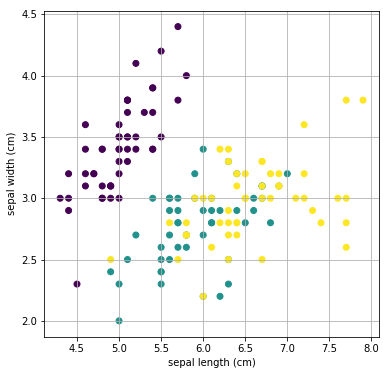

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.grid()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

There are two kinds of data in the dataset: training and test data. If we use one for training, we can use the other to estimate how accurate our technique will be with new data.

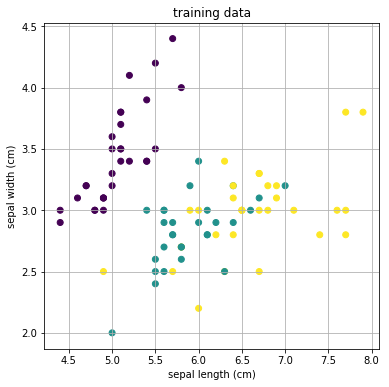

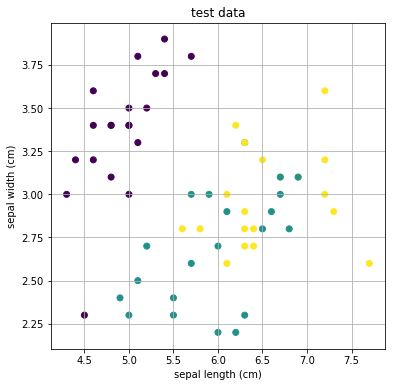

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

for x, y, title in [(x_train, y_train, 'training data'),
                   (x_test, y_test, 'test data')]:
    plt.figure(figsize=(6,6))
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.autoscale()
    plt.grid()
plt.show()

The simplest classifier might be nearest-neighbor: we check for the closest point to a given data point, and use the same category. We're going to do this only with the first two dimensions of the data so it's easier to visualize.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

x2d = iris.data[:,:2]
x2d_train, x2d_test, y2d_train, y2d_test = train_test_split(x2d, iris.target, test_size=0.4)

knn = KNeighborsClassifier()
knn.fit(x2d_train, y2d_train)
prediction = knn.predict(x2d_test)
correct = np.count_nonzero(prediction==y2d_test)
(100 * correct) / prediction.size

73

This should give an accuracy in the range 70-80%, which is a good first step. Let's visualize classification boundaries. code is based on [this example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html).

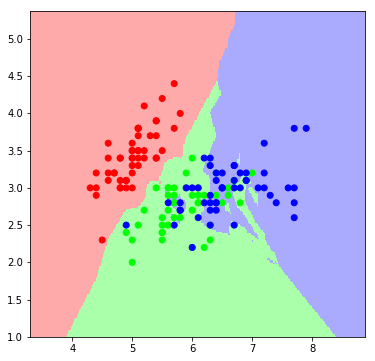

In [7]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02

x_min, x_max = x2d[:, 0].min() - 1, x2d[:, 0].max() + 1
y_min, y_max = x2d[:, 1].min() - 1, x2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(6,6))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.pcolormesh(xx, yy, z, cmap=cmap_light)
plt.scatter(x2d[:,0], x2d[:,1], c=iris.target, cmap=cmap_bold)

There's a lot of overlap between the green and blue categories, so let's run this again with all 4 features.

In [8]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
correct = np.count_nonzero(prediction==y_test)
(100 * correct)  / prediction.size

96

This should be more in the 90% range. How about another classifier?

Support vector machines (SVM) are one of the most powerful classifiers, also called a maximum margin classifier. In scikit-learn they are called "support vector classifiers" (SVC). For a great visualization of SVM check out this video: [SVM with polynomial kernel visualization](https://www.youtube.com/watch?v=3liCbRZPrZA). Here's a visualization of the simplest case:

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

In [9]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
correct = np.count_nonzero(prediction==y_test)
(100 * correct) / prediction.size

95

SVC can sometimes give higher accuracy on the test set than KNN. Both KNN and SVC are called in the same way using scikit-learn.

- training step: `classifier.fit(train_data, train_label)`
- classification/prediction step: `classifier.predict(test_data)`

This means you can test a bunch of classifiers with the same code. For an example, check out this code from the scikit-learn ["classifier comparison"](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py).

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

An aside: some people [think](https://twitter.com/dustinvtran/status/832021915187425281) this "fit-based" approach to machine learning can be counter-productive because it obscures the inner workings of each algorithm and makes it hard for researchers to make discoveries about [mistakes](http://www.pnas.org/content/113/28/7900.abstract) and explore new possiblities.